### Численное решение уравнения переноса

In [76]:
# Импортируем модули для расчётов
import numpy as np
import matplotlib.pyplot as plt
import math as m

In [77]:
L = m.pi # x = [0,pi] - длина области, в которой решается задача
C1 = 1.0 # lyambda
C2 = -1.0
T = 10.0
M = 51 # количество узлов вдоль оси
x = np.linspace(0, m.pi, M)
h = L / (M-1) # шаг по координате, h
dt = 0.2 * h / abs(C1) # коэффициент должен быть меньше единицы
print(dt)


u_init0 = []
v_init0 = []
for el in x:
    u_init0.append(m.sin(el))
    v_init0.append(m.cos(el)) 
u_init = np.array(u_init0)
v_init = np.array(v_init0)
w1_init = u_init + v_init #компоненты вектора w
w2_init = - u_init + v_init
#q_init = np.zeros(M) #это для посторения графика. Пусть обе компоненты вектора q в начале имели значения, равные единице, в средней трети области
#for i in range(int(1.0 / 3.0 * M), int(2.0 / 3.0 * M)):
# q_init[i] = 1 

0.012566370614359175


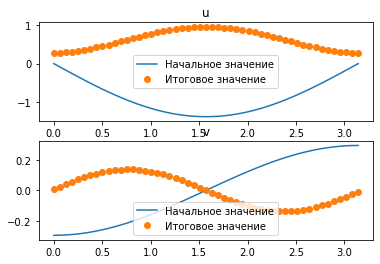

In [78]:
def Transport1 (w0, C): #здесь решается уравнение переноса сеточно-характеристическим методом
    w_next = np.zeros(M)
    w_curr = w0 # начальное ненулевое значение 
    for k in range(int(T / dt)):
        for i in range(M):
            if i == 0: # периодические граничные условия
                w_next[i] = w_curr[i] - dt * ((C+abs(C))/2*(w_curr[i]-w_curr[M-1])/h + (C-abs(C))/2*(w_curr[i+1]-w_curr[i])/h)
            if i == M-1:
                w_next[i] = w_curr[i] - dt * ((C+abs(C))/2*(w_curr[i]-w_curr[i-1])/h + (C-abs(C))/2*(w_curr[0]-w_curr[i])/h)
            if ((i != 0) and (i != M-1)):
                w_next[i] = w_curr[i] - dt * ((C+abs(C))/2*(w_curr[i]-w_curr[i-1])/h + (C-abs(C))/2*(w_curr[i+1]-w_curr[i])/h)
        for i in range(M):
            w_curr[i] = w_next[i]
    return(w_curr)

x_m = np.linspace(0,L,M) #для построения графика
w1 = Transport(w1_init, C1)
w2 = Transport(w2_init, C2)
u = (w1 - w2) / 2 #возвращаемся к компонетам вектора q
v = (w1 + w2) / 2
fig, ax = plt.subplots(2,1)
T=10.0
ax[0].plot(x_m, (m.cos(T)+m.sin(T))*np.array(u_init0), '-', label="Начальное значение")
ax[1].plot(x_m, (m.cos(T)-m.sin(T))*np.array(v_init0), '-', label="Начальное значение")
ax[0].plot(x_m, u, 'o', label="Итоговое значение")
ax[1].plot(x_m, v, 'o', label="Итоговое значение")
ax[0].set_title("u")
ax[1].set_title("v")
for _ in ax:
    _.legend()
plt.show()

In [15]:
import numpy as np
import math as m


[0.0, 0.3490658503988659, 0.6981317007977318, 1.0471975511965976, 1.3962634015954636, 1.7453292519943295, 2.0943951023931953, 2.443460952792061, 2.792526803190927, 3.141592653589793]


In [68]:
import numpy as np
a=np.linspace(0,5,6)
print(a*0.5)

[0.  0.5 1.  1.5 2.  2.5]
